In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_columns', 1000) 
np.random.seed(0)

In [3]:
#load datasets
df_train = pd.read_csv(r'F:\DS\Kernel\data\train.csv')
df_test = pd.read_csv(r'F:\DS\Kernel\data\test.csv')
# drop duplicates from train
df_train = df_train.drop_duplicates()

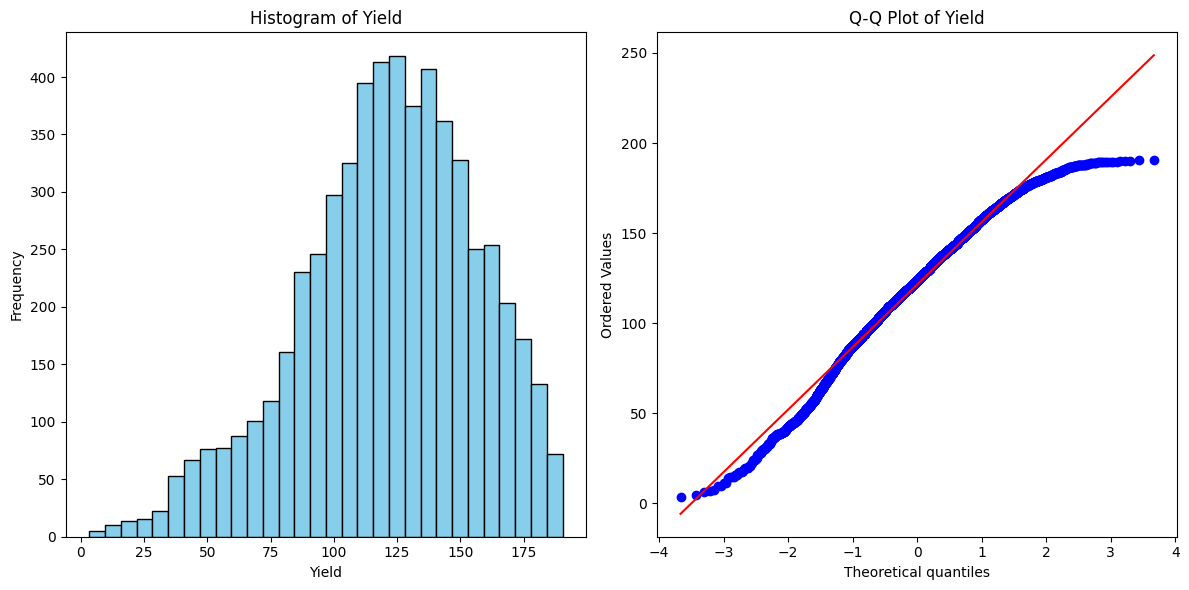

In [4]:
# Hist for 'Yield'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_train['Yield'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')

# QQ-plot for 'Yield'
plt.subplot(1, 2, 2)
stats.probplot(df_train['Yield'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Yield')

plt.tight_layout()
plt.show()

## Analysis of the Target Feature: Yield

The histogram of the Yield shows a roughly unimodal distribution with a peak around 125 units. The distribution is skewed to the right, indicating the presence of higher yields as outliers. 

The Q-Q plot of Yield, which compares the distribution of the observed values to a normally distributed set of values, reveals that the tails of the distribution deviate from normality. The lower tail (left side) deviates below the theoretical line indicating lighter tails than a normal distribution, while the upper tail (right side) deviates above the line indicating heavier tails. This suggests that the Yield data does not follow a normal distribution and may require log-transformation for analyses that assume normality.


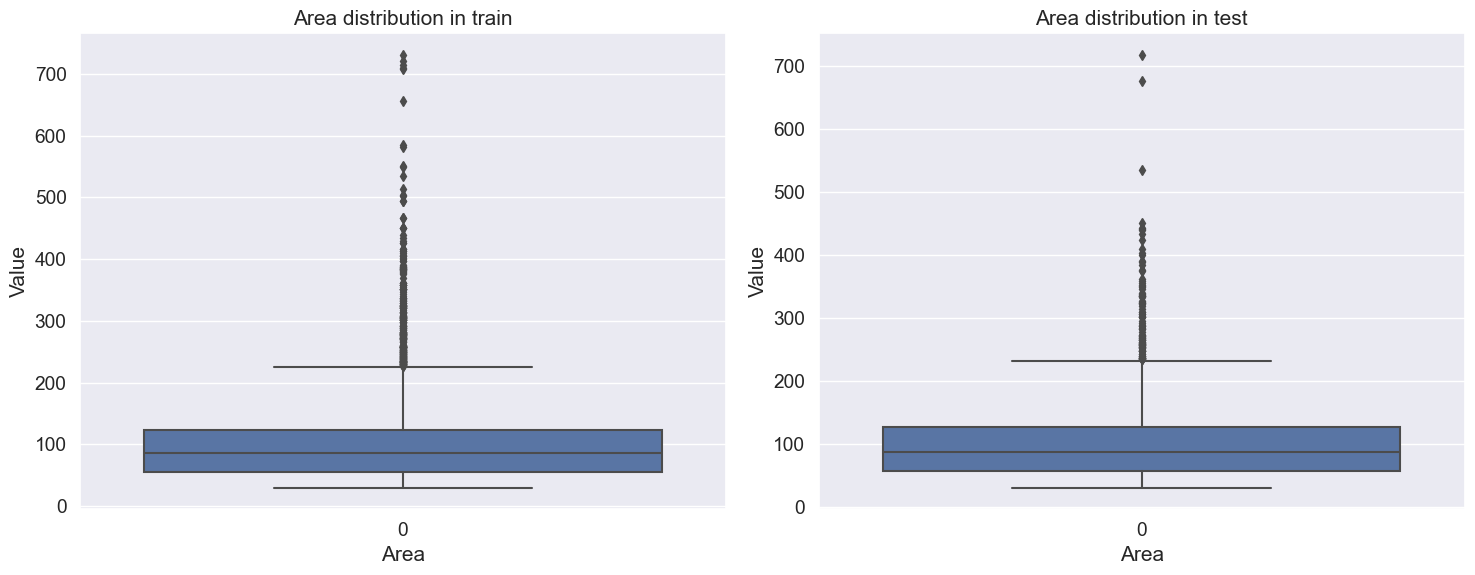

In [130]:
# plotting for Area in test and train sets
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))


sns.boxplot(df_train['Area'], ax=axes[0])
axes[0].set_title('Area distribution in train')
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Value')


sns.boxplot(df_test['Area'], ax=axes[1])
axes[1].set_title('Area distribution in test')
axes[1].set_xlabel('Area')
axes[1].set_ylabel('Value')


plt.tight_layout()
plt.show()

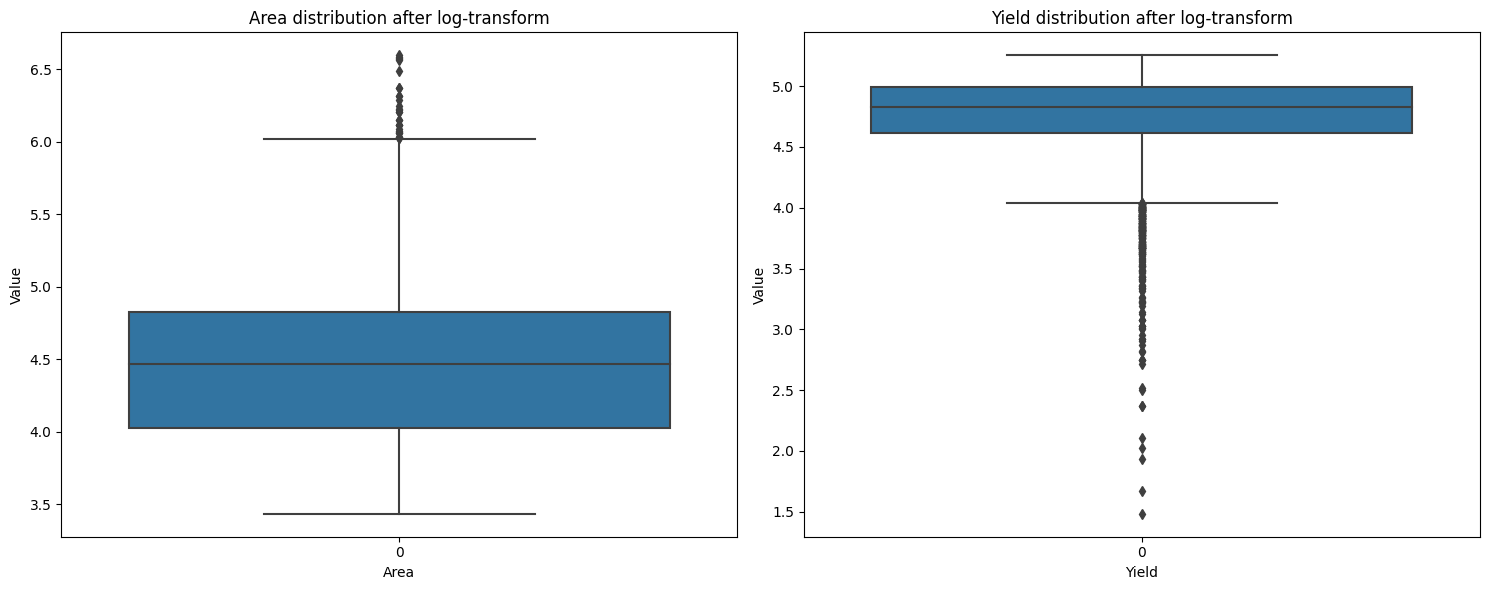

In [5]:
# plotting for Area in test and train sets
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))


sns.boxplot(df_train['Area'].apply(np.log1p), ax=axes[0])
axes[0].set_title('Area distribution after log-transform')
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Value')


sns.boxplot(df_train['Yield'].apply(np.log1p), ax=axes[1])
axes[1].set_title('Yield distribution after log-transform')
axes[1].set_xlabel('Yield')
axes[1].set_ylabel('Value')


plt.tight_layout()
plt.show()

### Area:
We see a lot of outliers for the test and training datasets for Area.
When modeling there will be a need to figure out how to interact with them

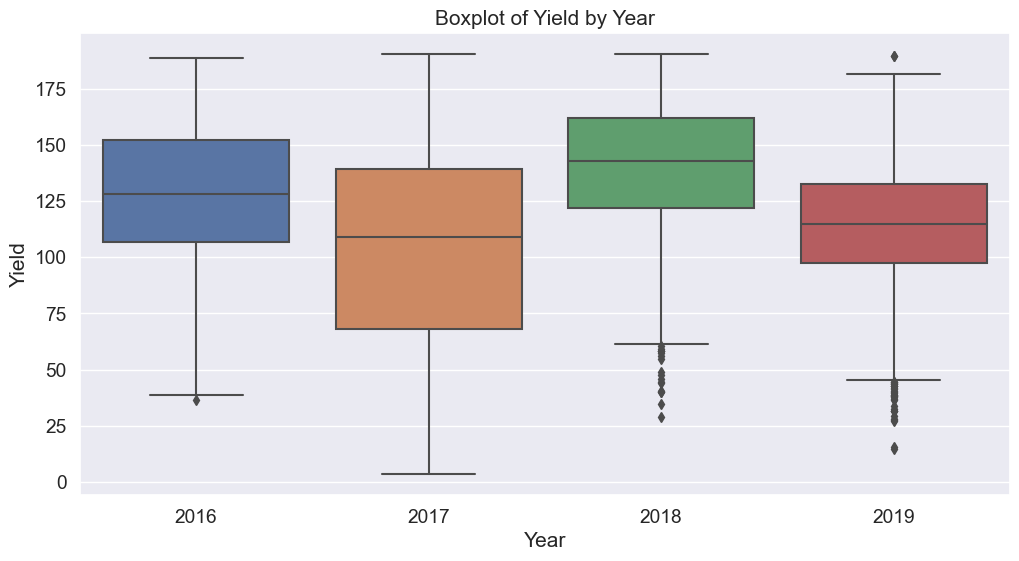

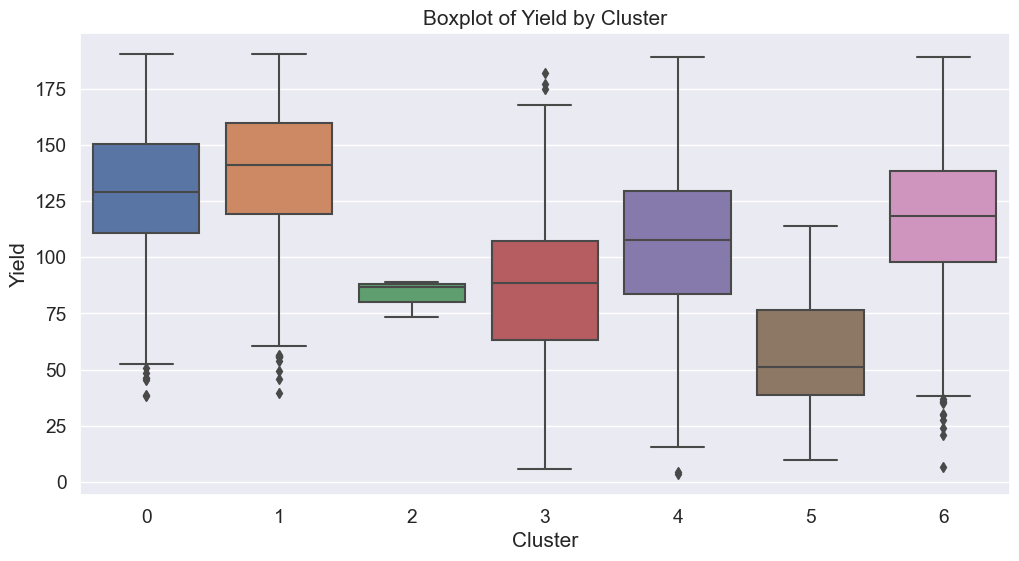

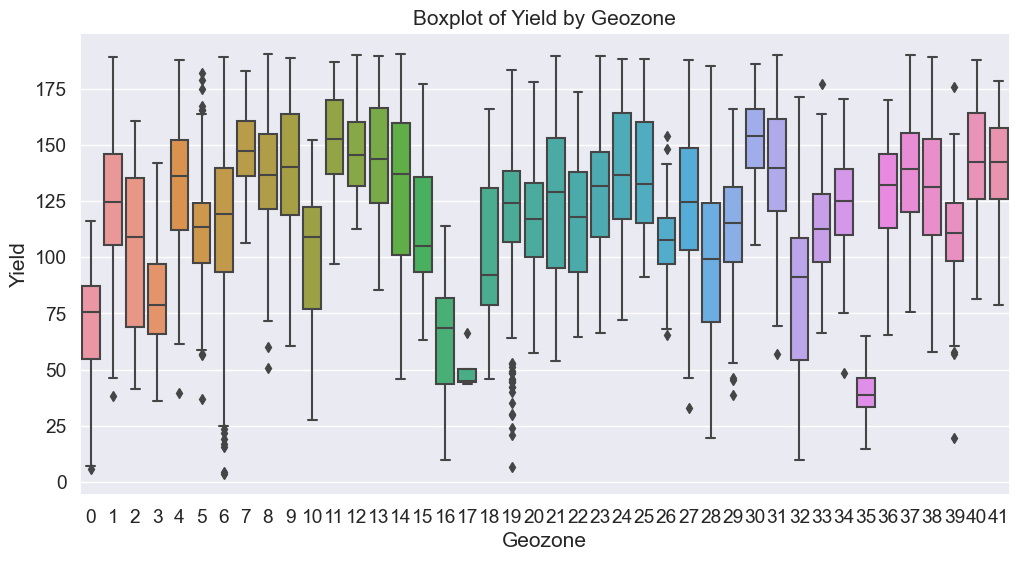

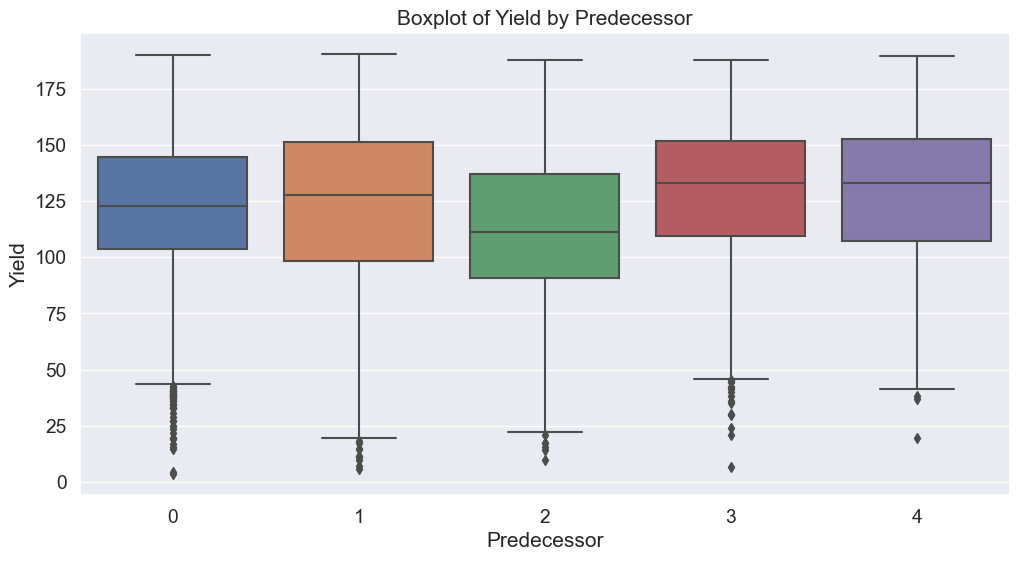

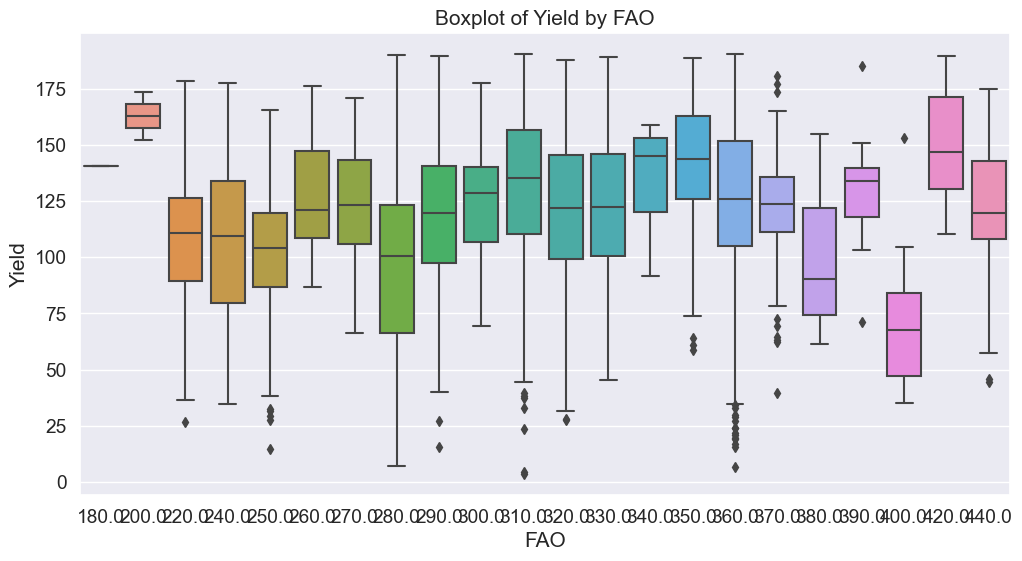

In [131]:
# Yield by categorial features
categorical_features = ['Year', 'Cluster', 'Geozone', 'Predecessor','FAO']


for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Yield', data=df_train)
    plt.title(f'Boxplot of Yield by {feature}')
    plt.show()

- Yield by Year: Central Tendency: The medians of yield vary from year to year, indicating annual changes in cultivation conditions such as weather and agricultural practices. Outliers: There are several outliers with very low yields in 2016 and 2018, which may point to extreme events or data errors. Trends: There is no clear trend of increase or decrease in yield over these years, although the median yield in 2019 seems slightly lower than in previous years.

- Geozones with higher yields may be located in more favorable agroclimatic conditions, while geozones with lower yields may be in less favorable conditions. This could include differences in climate, soil, water availability, or other factors affecting agricultural production.

- Predecessor: Crop 2 has a noticeably lower median yield, which may indicate its less effectiveness as a predecessor, yet the variability for this crop is minimal, suggesting a more stable yield outcome after this preceding crop. Crops 3 and 4 show the highest median yield, which may testify to the most positive effect from them as a predecessor.

- FAO: If different FAO values represent various types of agricultural crops or practices, then they demonstrate different degrees of yield, but without a clear overall trend in the data.

- Cluster: Yield varies significantly depending on the geographic cluster, reflecting differences in agroclimatic conditions, farming methods, and other regional factors. In clusters 0 and 1, the yield is higher, while in clusters 2 and 5, it is lower.


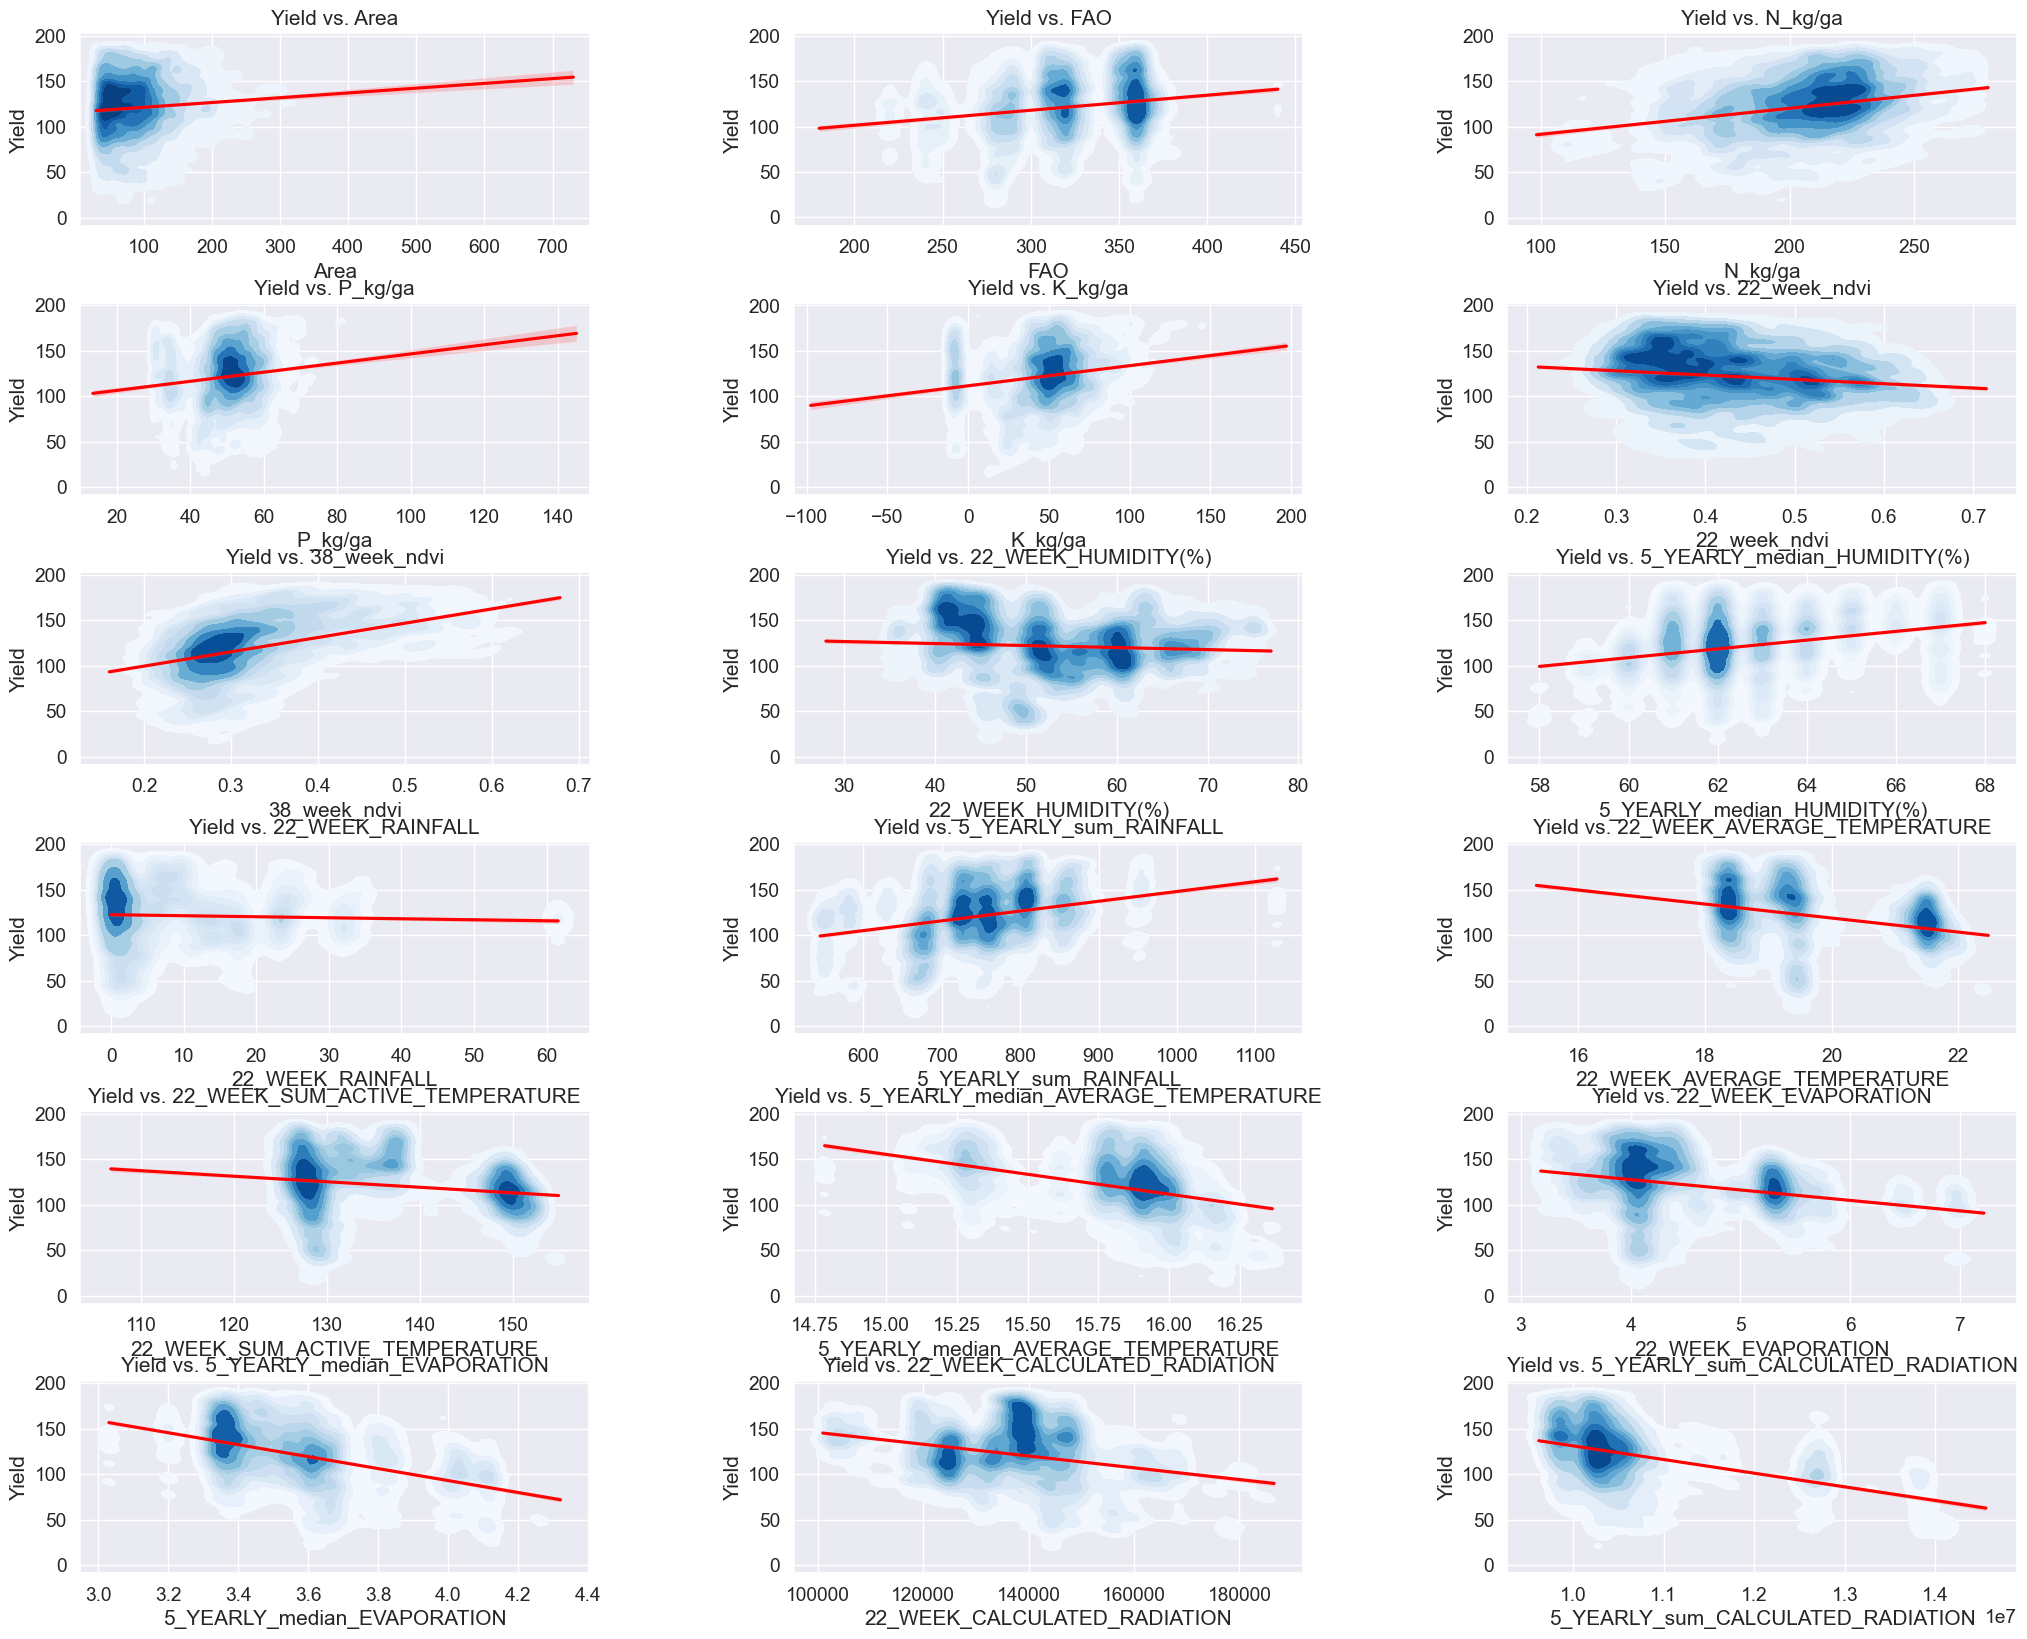

In [132]:
numeric_features = ['Area', 'FAO', 'N_kg/ga', 'P_kg/ga', 'K_kg/ga', '22_week_ndvi','38_week_ndvi',
                    '22_WEEK_HUMIDITY(%)','5_YEARLY_median_HUMIDITY(%)','22_WEEK_RAINFALL','5_YEARLY_sum_RAINFALL',
                    '22_WEEK_AVERAGE_TEMPERATURE','22_WEEK_SUM_ACTIVE_TEMPERATURE','5_YEARLY_median_AVERAGE_TEMPERATURE',
                    '22_WEEK_EVAPORATION','5_YEARLY_median_EVAPORATION',
                    '22_WEEK_CALCULATED_RADIATION','5_YEARLY_sum_CALCULATED_RADIATION',
                    ]

n_rows = 6
n_cols = 3


fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 20))


plt.subplots_adjust(hspace=0.4, wspace=0.4)


for i, feature in enumerate(numeric_features):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
   
    sns.kdeplot(ax=ax, data=df_train, x=feature, y='Yield', cmap="Blues", fill=True, bw_adjust=0.5)
    

    sns.regplot(ax=ax, data=df_train, x=feature, y='Yield', scatter=False, color='red')
    

    ax.set_title(f'Yield vs. {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Yield')


plt.show()

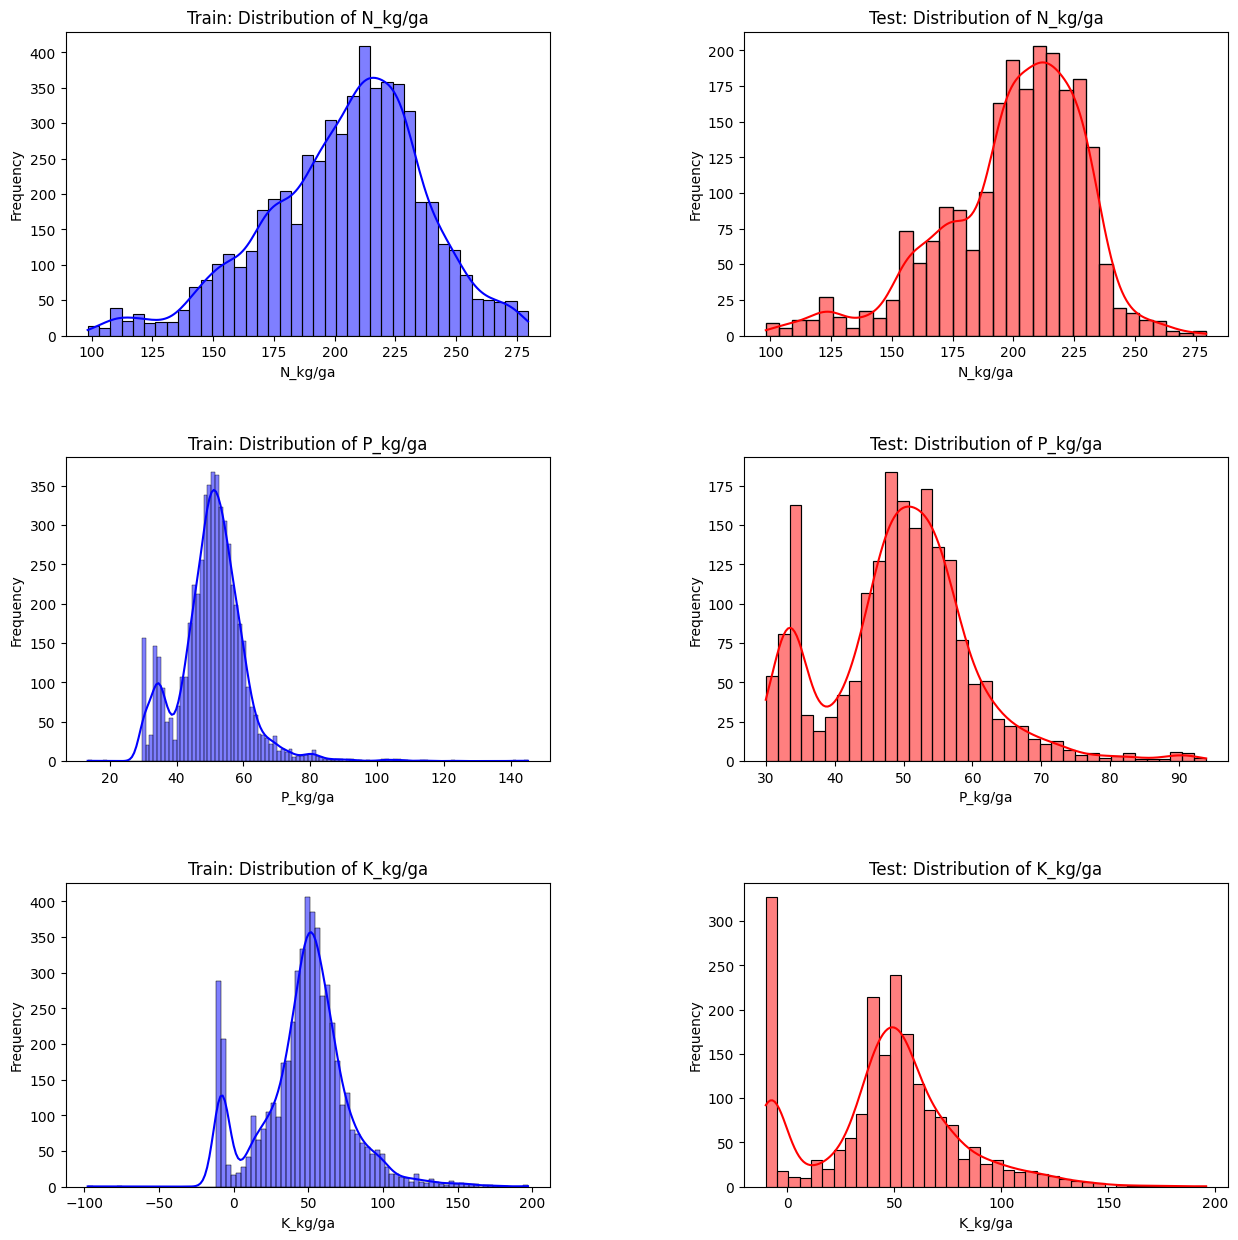

In [8]:
# Specify the features you're interested in
features = ['N_kg/ga', 'P_kg/ga', 'K_kg/ga']

n_rows = 3  # One row for each feature
n_cols = 2  # Two columns for train and test

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, feature in enumerate(features):
    # Plot for training data
    ax_train = axes[i, 0]
    sns.histplot(ax=ax_train, data=df_train, x=feature, kde=True, color='blue')
    ax_train.set_title(f'Train: Distribution of {feature}')
    ax_train.set_xlabel(feature)
    ax_train.set_ylabel('Frequency')

    # Plot for testing data
    ax_test = axes[i, 1]
    sns.histplot(ax=ax_test, data=df_test, x=feature, kde=True, color='red')
    ax_test.set_title(f'Test: Distribution of {feature}')
    ax_test.set_xlabel(feature)
    ax_test.set_ylabel('Frequency')

plt.show()

General Trends:

- It cannot be definitively stated that the size of the field significantly influences yield.
- Crops with a high FAO index have higher yields.
- The amount of nitrogen fertilizers applied leads to greater yields.
- It cannot be unequivocally stated that increasing the amounts of phosphorus and potassium in the soil will yield a higher harvest. It can also be asserted that the data for these fertilizers contain incorrect values, as indicated by the vertical cluster of points to the left of each graph.
- The NDVI index over 22 weeks does not have a clearly expressed influence on yield, while over 38 weeks the trend of influence is more pronounced.
- Soil humidity within the range of 40-45% (22 weeks) contributes to a higher yield.
- Higher temperatures generally have a negative impact on yield.
- Higher evaporation rates generally have a negative impact on yield.
- Higher radiation values generally have a negative impact on yield.
- The density distribution of fertilizer data shows that the values are either multi-model distributed or the data contains errors. It is possible that data scaling was previously applied


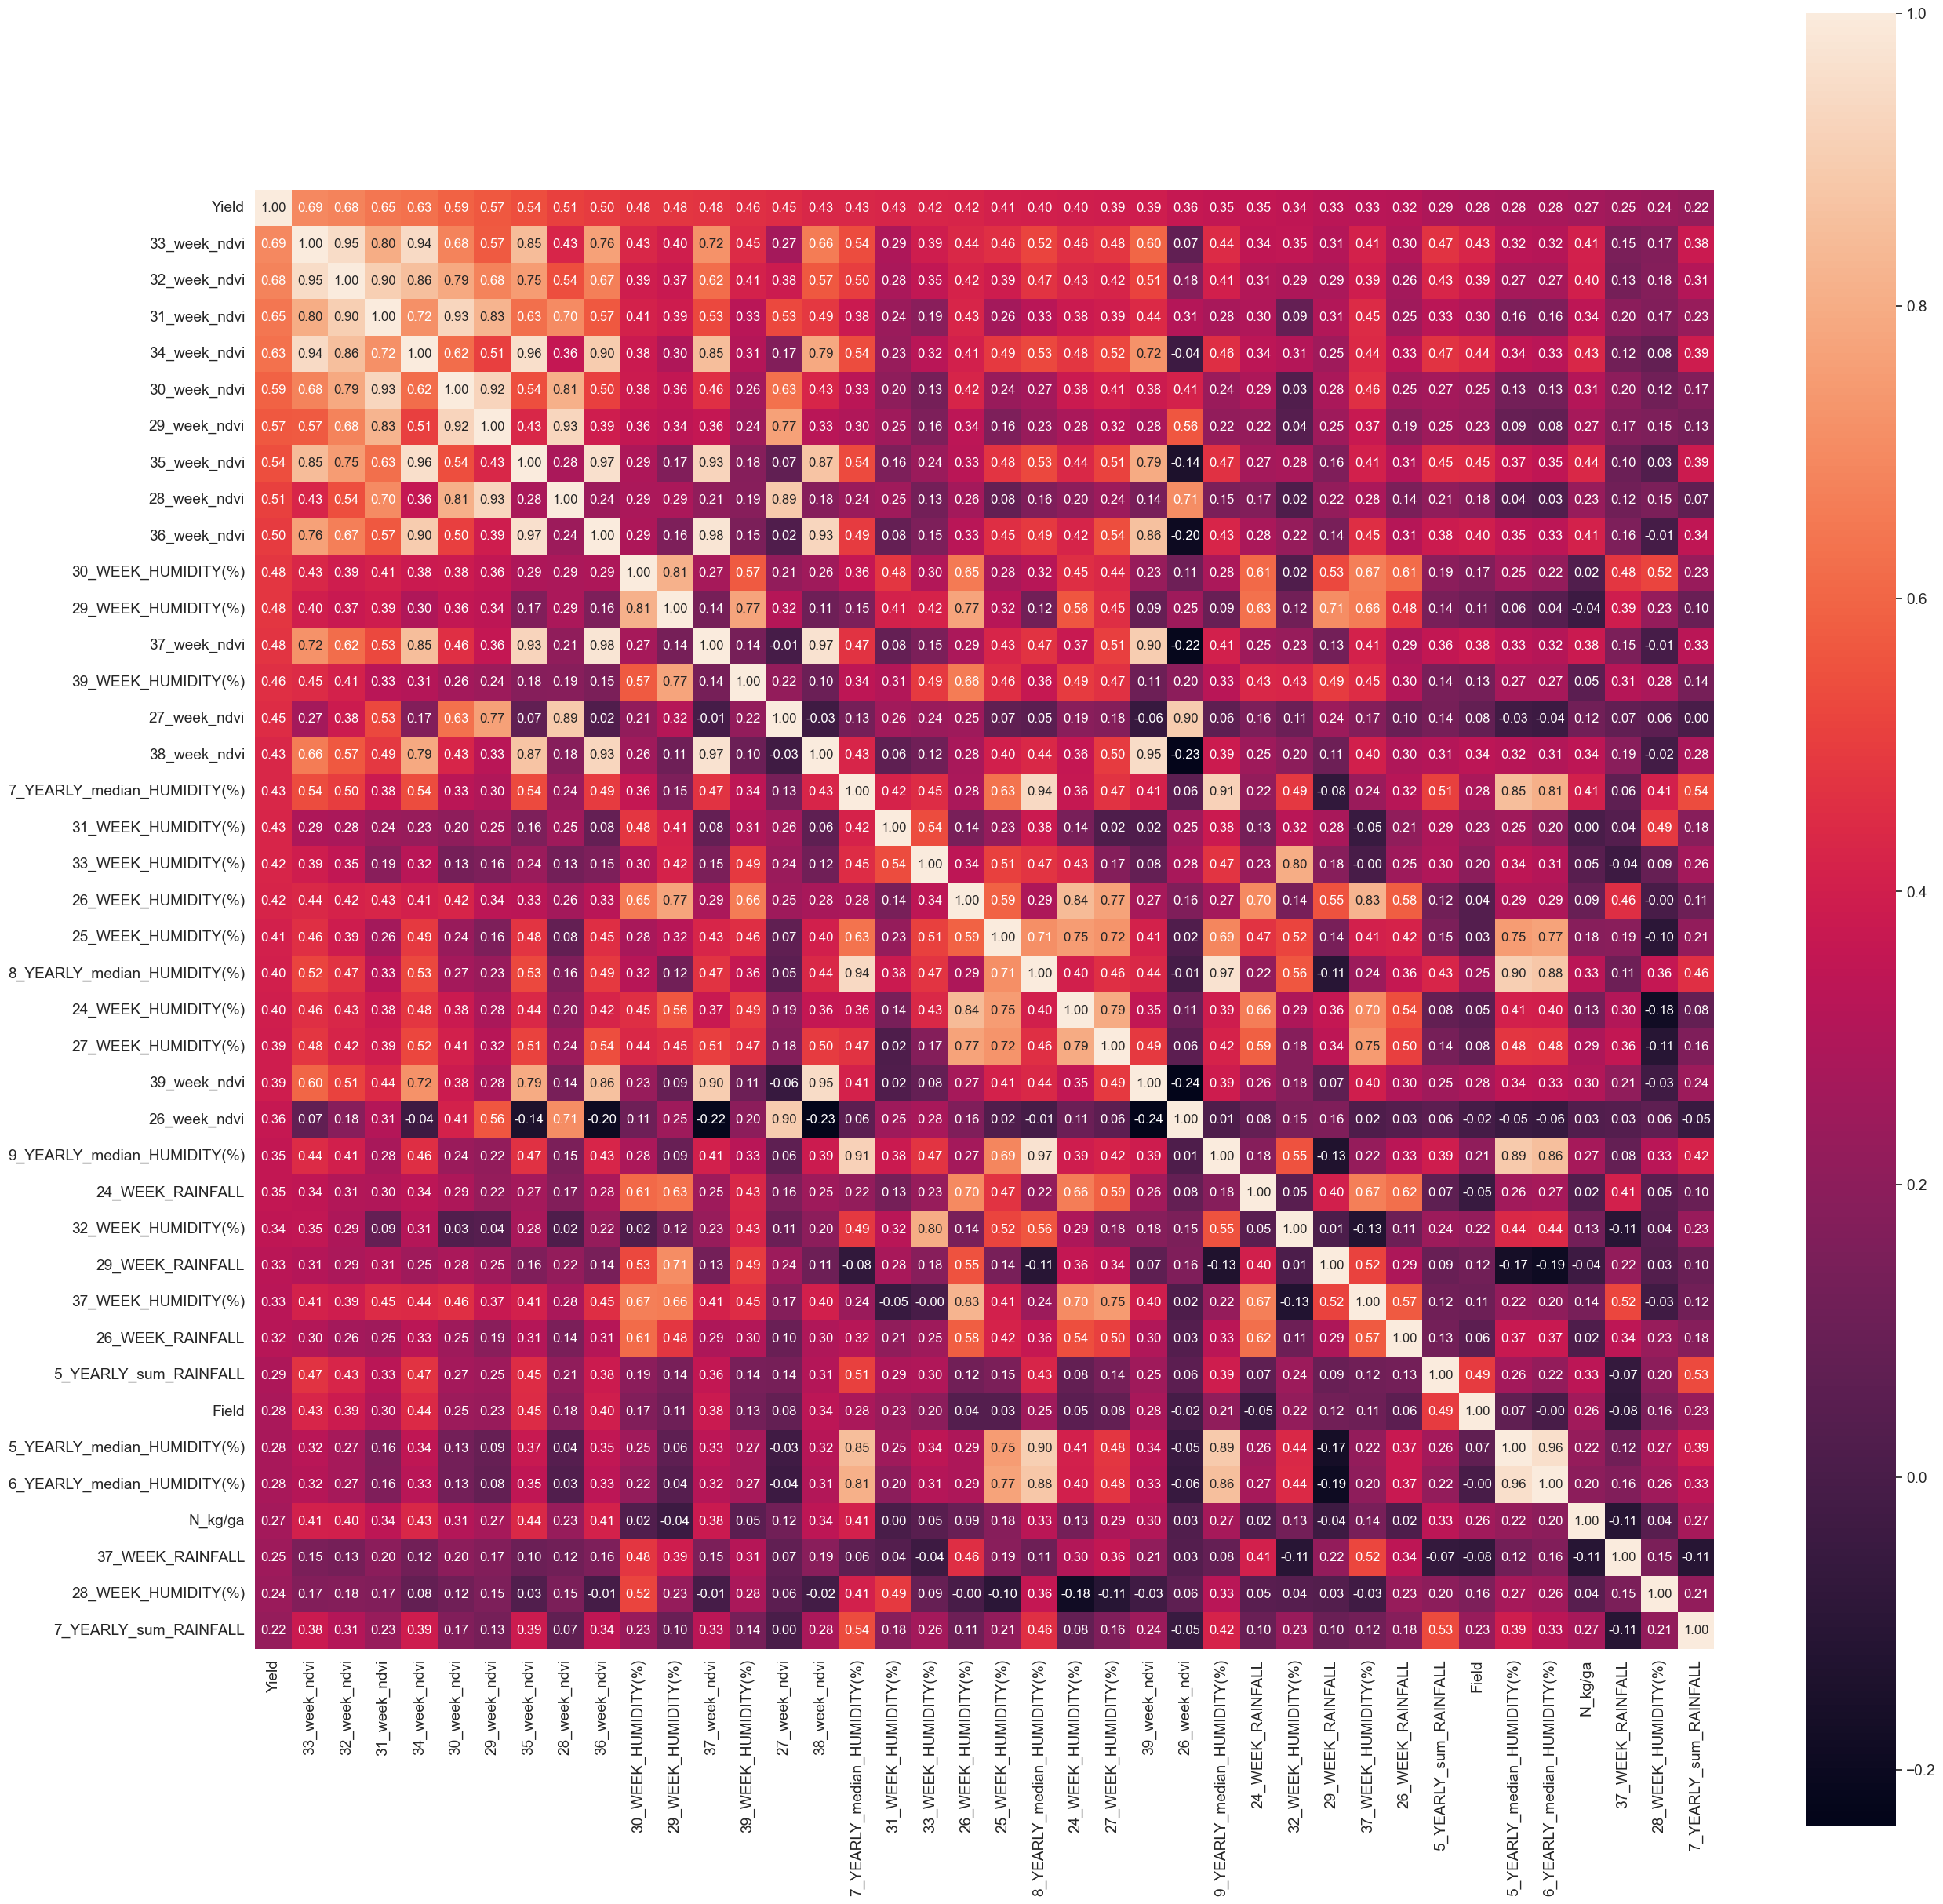

In [133]:
corrmat = df_train.corr()
k = 40
cols = corrmat.nlargest(k, 'Yield')['Yield'].index
cm = np.corrcoef(df_train[cols].values.T)
fig, ax = plt.subplots(figsize=(30,30))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values, ax=ax)
plt.show()

The heat map of correlation indicates that the vegetation indices NDVI, which are mostly multicollinear among themselves, along with the HUMIDITY , have the highest linear dependency with the target variable Yield. 
The dataset also contains numerous multicollinear features that should be consolidated or removed when training a regression model.


In [134]:
df = df_train.copy()
df.fillna(0,inplace=True)
X = df.drop('Yield', axis=1)
y = df.Yield
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    """mutual info-scores calculator"""
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi = make_mi_scores(X, y) 
mi.head(10), mi.tail(10)


(27_WEEK_SUM_ACTIVE_TEMPERATURE    0.421012
 28_WEEK_AVERAGE_TEMPERATURE       0.414918
 29_WEEK_SUM_ACTIVE_TEMPERATURE    0.414903
 37_WEEK_CALCULATED_RADIATION      0.414311
 24_WEEK_SUM_ACTIVE_TEMPERATURE    0.401658
 38_WEEK_AVERAGE_TEMPERATURE       0.398709
 28_WEEK_SUM_ACTIVE_TEMPERATURE    0.394825
 24_WEEK_EVAPORATION               0.390322
 23_WEEK_SUM_ACTIVE_TEMPERATURE    0.389652
 32_WEEK_SUM_ACTIVE_TEMPERATURE    0.384855
 Name: MI Scores, dtype: float64,
 K_kg/ga         0.112305
 FAO             0.109428
 N_kg/ga         0.082985
 25_week_ndvi    0.070328
 P_kg/ga         0.061365
 22_week_ndvi    0.055219
 24_week_ndvi    0.053973
 23_week_ndvi    0.045123
 Area            0.037935
 Predecessor     0.018074
 Name: MI Scores, dtype: float64)

Based on the mutual information analysis, it can be stated that the Vegetation Index NDVI highly correlates with the target variable and reveals a linear relationship between them, but does not capture more complex nonlinear interactions among these variables. 

On the other hand, features that temperature and solar radiation have a higher nonlinear relationship with the target variable, which is not detected by correlation analysis.


Based on mutual information and correlation analyses:

1. **Temperature and Radiation**: These have high mutual information with yield, indicating complex, potentially non-linear relationships.
2. **NDVI Metrics**: Display the highest linear correlation with yield, signifying a strong direct relationship with crop health and productivity.
3. **Radiation and Evaporation**: Significant correlations and mutual information suggest non-linear impacts on yield alongside NDVI.
4. **Implications**: For predictive modeling, consider both NDVI for its linear predictive power and other factors like temperature and radiation for capturing broader, more complex yield influences.

In essence, while NDVI is a key linear predictor, complex and non-linear relationships with other environmental factors are also crucial to understanding yield variability.


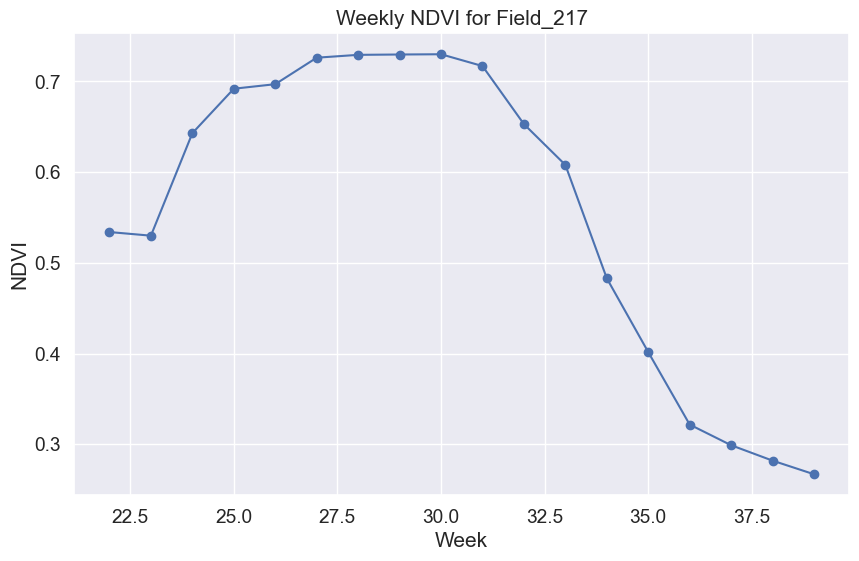

In [140]:
# ndvi data vizualization
field_data = df_train[(df_train['Field'] == 217)&(df_train.Year==2018)]

weeks = [f"{i}_week_ndvi" for i in range(22, 40)]
ndvi_values = field_data[weeks].mean() 


plt.figure(figsize=(10, 6))
plt.plot(range(22, 40), ndvi_values, marker='o', linestyle='-')
plt.title('Weekly NDVI for Field_217')
plt.xlabel('Week')
plt.ylabel('NDVI')
plt.grid(True)
plt.show()

#### Additional week-ndvi analysis

In the final part of this analysis, I want to take a detailed look at the visualization of the **week_ndvi** feature for a single field and a specific year. I would like to understand if we can, if necessary, approximate the missing values of the 39_week_ndvi feature in the test dataset if this feature turns out to be important for the model during further analysis.

I assume that such an approximation will be possible when using polynomial regression to obtain the missing value of a 39-week_ndvi feature in the test dataset.